# Background
미수를 사용하기 때문에 승률이 높아야 한다.  
승률이 낮을 경우 빠르게 자본금이 감소한다.  
그러므로 승률이 낮은 매수구간을 제외한다.  
유튜브: https://youtu.be/YUsfrdthccA

# IMPORT

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [69]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,특징주,SEN,강세 토픽
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,NaN,NaN,NaN
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,NaN,NaN,NaN
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,NaN,NaN,NaN
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,NaN,NaN,NaN
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,NaN,NaN,NaN


# Preprocessing

In [70]:
list = []

for i in range(len(df)):
    change = df['매수등락률'].iloc[i]
    profit = df['수익률'].iloc[i]
    
    list.append([change, profit])
    

In [71]:
df = pd.DataFrame(list, columns=['change','profit'])
df = df.sort_values('change')
df = df.reset_index(drop=True)
df.head()

,change,profit
0,4.56,0.22
1,5.37,-4.23
2,5.42,-0.21
3,6.15,-1.01
4,6.60,0.66


In [72]:
X = df['change']
y = df['profit']

# Visualization
빨간선(수익률=0%)을 기준으로 위아래 점을 세어보고 비교한다.  
[노란선 좌측] 매수등락률 손실 구간은 8% 미만이다. (수익 < 손실) → 아래에 점이 많고 손실이 크다.     
[가운데 중앙] 매수등락률 보합 구간은 8~25% 사이다. (수익 = 손실) → 위아래 둘 다 점이 많다.   
[초록선 우측] 매수등락률 수익 구간은 25% 이상이다. (수익 > 손실) → 위에 점이 많고 수익이 크다.  

수익이 나는 구간은 25% 이상 상따 구간이다.

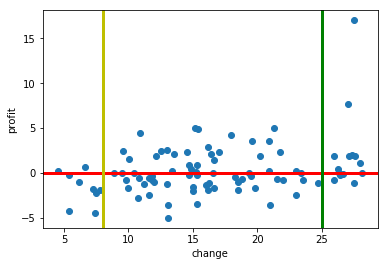

In [85]:
plt.scatter(X, y)
plt.xlabel('change')
plt.ylabel('profit')
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=8, color='y', linewidth=3)
plt.axvline(x=25, color='g', linewidth=3)
plt.show()

# Conclusion
25% 이상 구간에서만 매매한다.  